# First attempt at calculating width of trees

Using keypoints from 2D perceptree image, map those to depth image, calculate width in units

Next => divide width in units by (units_per_meter) => get exact width in meters 

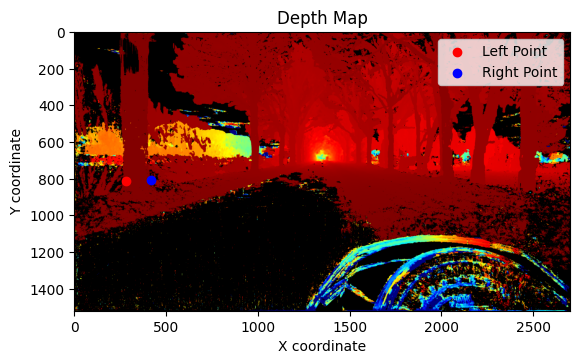

The width of the tree trunk is: 11.996999199469249 units
The width of the tree trunk is: 11.996999199469249 units
The distance to the midpoint from the left point is: 5.99904775399908 units
The distance to the midpoint from the right point is: 5.9992271390621426 units


In [42]:
import numpy as np
import cv2

def compute_3d_coordinates_simple_radial(x, y, depth, fx, cx, cy, k1):
    # Assuming distortion is negligible for simplicity.
    X = (x - cx) * depth / fx
    Y = (y - cy) * depth / fx
    Z = depth
    return np.array([X, Y, Z])

def compute_tree_trunk_width(left_point, right_point, depth_map, fx, cx, cy, k1):
    x1, y1 = left_point
    x2, y2 = right_point
    
    depth1 = depth_map[y1, x1]
    depth2 = depth_map[y2, x2]
    
    point1_3d = compute_3d_coordinates_simple_radial(x1, y1, depth1, fx, cx, cy, k1)
    point2_3d = compute_3d_coordinates_simple_radial(x2, y2, depth2, fx, cx, cy, k1)
    
    width = np.linalg.norm(point1_3d - point2_3d)
    return width

# Example usage
depth_map_path = 'eastbound_20240319_07851_depth.png'
depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)

# Resize the depth map to match the input image size
input_image_size = (2704, 1520)
depth_map = cv2.resize(depth_map, input_image_size, interpolation=cv2.INTER_NEAREST)

import matplotlib.pyplot as plt

plt.imshow(depth_map)
plt.title('Depth Map')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
# plt.show()



# print(depth_map.size)

# Camera intrinsics
fx = 1463.2
cx = 1352
cy = 760
k1 = 0.01502


# enkele keypoints uittesten op depth images

#  [
#     281.7899475097656,
#     811.9313354492188,
#     4.433836460113525
# ],
# [
#     418.49737548828125,
#     805.848388671875,
#     0.8606317043304443
# ],

#  [
#     2415.640625,
#     831.8865356445312,
#     1.151667833328247
# ],
# [
#     2497.210205078125,
#     831.8865356445312,
#     0.8899378180503845
# ],


# [
#     1993.714111328125,
#     772.6473999023438,
#     0.6860290765762329
# ],
# [
#     2050.280029296875,
#     772.6473999023438,
#     0.6126059889793396
# ],


left_point = (281, 811)
right_point = (418, 805)

# left_point = (281, 811)
right_point = (415, 805)

# left_point = (2415, 831)
# right_point = (2497, 831)
# left_point = (2000, 772)
# right_point = (2050, 772)

plt.scatter(*left_point, color='red', label='Left Point')  # Scatter plot for left point
plt.scatter(*right_point, color='blue', label='Right Point')  # Scatter plot for right point

# Adding a legend to identify the points
plt.legend()

plt.show()



width = compute_tree_trunk_width(left_point, right_point, depth_map, fx, cx, cy, k1)
print(f"The width of the tree trunk is: {width} units")


# Function to compute the distance between two 3D points
def compute_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


# Compute the midpoint
mid_point = ((left_point[0] + right_point[0]) // 2, (left_point[1] + right_point[1]) // 2)

# Get depth values
depth_left = depth_map[left_point[1], left_point[0]]
depth_right = depth_map[right_point[1], right_point[0]]
depth_mid = depth_map[mid_point[1], mid_point[0]]

# Compute 3D coordinates
point3d_left = compute_3d_coordinates_simple_radial(left_point[0], left_point[1], depth_left, fx, cx, cy, k1)
point3d_right = compute_3d_coordinates_simple_radial(right_point[0], right_point[1], depth_right, fx, cx, cy, k1)
point3d_mid = compute_3d_coordinates_simple_radial(mid_point[0], mid_point[1], depth_mid, fx, cx, cy, k1)

# Compute distances
width = compute_distance(point3d_left, point3d_right)
distance_to_mid = compute_distance(point3d_left, point3d_mid)

print(f"The width of the tree trunk is: {width} units")
print(f"The distance to the midpoint from the left point is: {distance_to_mid} units")
print(f"The distance to the midpoint from the right point is: {compute_distance(point3d_right, point3d_mid)} units")

